# Examples of the usage

Import dataset class

In [1]:
from urbanworm import UrbanDataSet

## 1 single-image inference

### 1.1 one image input

Initialize dataset object

In [4]:
data = UrbanDataSet(image = './data/test1.jpg')

To let the model understand the task, we need to specify what information we want to know from the input image and the format it should follow to structure the response. In some cases, giving more contexts such as the definition of terminology/concept and criteria for decision making may enhance the inference ability of model.

In [ ]:
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = '''
    Is there any damage on the roof?
'''
res = data.oneImgChat(system=system, prompt=prompt)

Inference starts ...


The default format of schema for the output includes:
- question
- answer
- explanation

When saveImg=True, image will be save in the base64 format.

In [4]:
res.keys()

dict_keys(['question', 'answer', 'explanation', 'img'])

In [5]:
res['question'], res['answer'], res['explanation']

('Is there any damage on the roof?',
 'No',
 'Based on the image, the roof appears to be intact and without any visible signs of damage like missing shingles or significant discoloration. It looks generally well-maintained.')

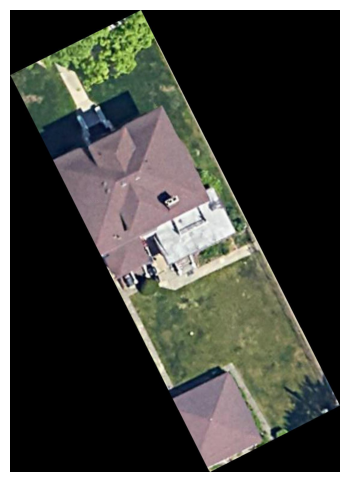

In [5]:
data.plotBase64(res['img'])

### 1.2 customize the format for output

For different research purposes, you can customize the format of responses from the model

In [6]:
from urbanworm.format_creation import create_format

The response format can be customized. In the example below, "explanation" is replaced by "confidence", which measures how the model is confident with its answer.

In [7]:
# specify the new schema in a dictionary
schema = {
    "question": (str, ...),
    "answer": (str, ...),
    "confidence": (float, ...), 
}
# define a new Response class
CustomResponse = create_format(schema)

In [8]:
data = UrbanDataSet(image = './data/test2.jpg', format=CustomResponse)
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), confidence (0-1)
'''
prompt = '''
    Is there any damage on the roof?
'''
res = data.oneImgChat(system=system, prompt=prompt)
res.keys()

Inference starts ...


dict_keys(['question', 'answer', 'confidence', 'img'])

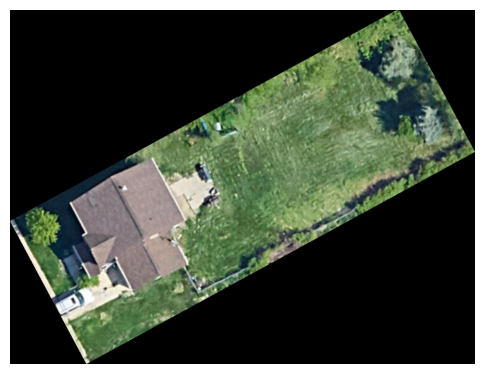

In [9]:
data.plotBase64(res['img'])

In [11]:
res['question'], res['answer'], res['confidence']

('Is there any damage on the roof?', 'no', 0.8)

## 2 batch images inference

### 2.1 batch images input

In [ ]:
imgs = ['./data/test1.jpg', './data/test2.jpg', './data/test3.jpg',]
data = UrbanDataSet(images = imgs)
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = '''
    Is there any damage on the roof?
    Is there solar panel on the roof?
'''
res = data.loopImgChat(system=system, prompt=prompt, output_df=True, saveImg=False)
res

### 2.2 Open-source building footprints

In [10]:
bbox = (-83.235572,42.348092,-83.235154,42.348806)
data = UrbanDataSet()
data.bbox2Buildings(bbox, source='osm')

'5 buildings found in the bounding box.'

In [11]:
data.units

,geometry
0,"POLYGON ((-83.23534 42.3488, -83.23523 42.3488..."
1,"POLYGON ((-83.23533 42.34865, -83.23522 42.348..."
2,"POLYGON ((-83.23533 42.3485, -83.23522 42.3485..."
3,"POLYGON ((-83.23533 42.34835, -83.23521 42.348..."
4,"POLYGON ((-83.23532 42.34821, -83.23521 42.348..."


<Axes: >

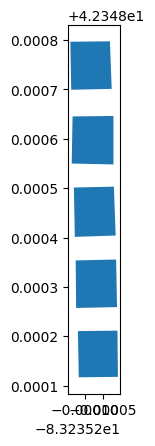

In [12]:
data.units.plot()

The output can be assigned to a new variable. It is also automatically stored in the data structure and can be called.

In [13]:
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = {
    'top':'''
        Is there any damage on the roof?
    '''
}

# inspect the aerial images only (with type='top')
res = data.loopUnitChat(system=system, prompt=prompt, type='top', epsg=2253)

Processing...: 100%|█████████████████████████| 5/5 [01:38<00:00, 19.61s/it]

Reset message history.


In [15]:
data.to_gdf()

,geometry,top_view_question1,top_view_answer1,top_view_explanation1,top_view_base64
0,POINT (-83.23528 42.34875),Is there any damage on the roof?,No,"Based on the top-down view, the roof appears i...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,POINT (-83.23528 42.3486),Is there any damage on the roof?,No,"Based on the image, the roof appears intact an...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,POINT (-83.23527 42.34845),Is there any damage on the roof?,No,"Based on the image, the roof appears intact an...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,POINT (-83.23527 42.34831),Is there any damage on the roof?,No,"Based on the image, the roof appears to be int...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,POINT (-83.23526 42.34816),Is there any damage on the roof?,No,The roof appears intact and uniform. There are...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


With `type = 'both'` (The default is `top`.), the method `loopUnitChat` can inspect both aerial and street view images. 
With `multi = True` (The default is `False`), for each unit, three closest street views will be collected for inference. This will take longer time to process the data.

In this case, the instruction and prompt will be little bit different and more detailed for specifying questions for each type of image.

In [ ]:
system = '''
    Given a top view image or street view images, you are going to roughly estimate house conditions. 
    Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words) for each question.
'''

prompt = {
    'top': '''
        Is there any damage on the roof?
    ''',
    'street': '''
        Is the house occupied?
        Is any window broken or boarded?
        Is the door missing or boarded?
        Is the wall missing or damaged?
        Is the yard maintained well?
    '''
}

# add the Mapillary key
data.mapillary_key = 'MLY|...'
# inspect both the aerial and street view images (with type='both')
res = data.loopUnitChat(system=system, prompt=prompt, type='both', epsg=2253, multi=True)

Processing...: 100%|████████████████████████| 5/5 [08:29<00:00, 101.96s/it]

Reset message history.


In [17]:
data.to_gdf()

,geometry,top_view_question1,top_view_answer1,top_view_explanation1,street_view_question1,street_view_answer1,street_view_explanation1,street_view_question2,street_view_answer2,street_view_explanation2,...,street_view_answer3,street_view_explanation3,street_view_question4,street_view_answer4,street_view_explanation4,street_view_question5,street_view_answer5,street_view_explanation5,top_view_base64,street_view_base64
0,POINT (-83.23528 42.34875),Is there any damage on the roof?,No,The roof appears intact and doesn's show any v...,"[Is the house occupied?, Is the house occupied...","[no, no, no]","[There are no signs of activity, like cars in ...","[Is any window broken or boarded?, Is any wind...","[no, no, no]",[All windows appear intact and are not covered...,...,"[no, no, no]",[The front door is present and appears to be i...,"[Is the wall missing or damaged?, Is the wall ...","[no, no, no]",[The visible walls of the houses appear to be ...,"[Is the yard maintained well?, Is the yard mai...","[no, no, no]",[The yards appear somewhat overgrown with fall...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
1,POINT (-83.23528 42.3486),Is there any damage on the roof?,No,"Based on the image, the roof appears intact an...","[Is the house occupied?, Is the house occupied...","[no, no, no]","[There are no signs of activity, like cars or ...","[Is any window broken or boarded?, Is any wind...","[no, no, no]","[All windows appear intact and clear, with no ...",...,"[no, no, no]",[The front door is present and appears undamag...,"[Is the wall missing or damaged?, Is the wall ...","[no, no, no]",[The visible walls of the house appear intact ...,"[Is the yard maintained well?, Is the yard mai...","[no, no, yes]","[The grass is overgrown, and there's some debr...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
2,POINT (-83.23527 42.34845),Is there any damage on the roof?,No,The roof appears intact and doesn't show any v...,"[Is the house occupied?, Is the house occupied...","[no, no, no]","[There are two cars parked in the yard, which ...","[Is any window broken or boarded?, Is any wind...","[no, no, no]",[All windows appear intact. There are no visib...,...,"[no, no, no]",[The front door is present and appears to be i...,"[Is the wall missing or damaged?, Is the wall ...","[no, no, no]",[The visible walls of the house appear to be i...,"[Is the yard maintained well?, Is the yard mai...","[no, no, no]",[The yard is overgrown with weeds and the gras...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
3,POINT (-83.23527 42.34831),Is there any damage on the roof?,No,"Based on the image, the roof appears intact an...","[Is the house occupied?, Is the house occupied...","[no, no, no]","[There is a car parked in front of the house, ...","[Is any window broken or boarded?, Is any wind...","[no, no, no]",[All windows appear intact and are not boarded...,...,"[no, no, no]",[The front door is present and appears intact....,"[Is the wall missing or damaged?, Is the wall ...","[no, no, no]",[The visible walls of the house appear to be i...,"[Is the yard maintained well?, Is the yard mai...","[no, no, no]","[The yard is overgrown with weeds and grass, i...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
4,POINT (-83.23526 42.34816),Is there any damage on the roof?,No,The roof appears intact and doesn't show any v...,"[Is the house occupied?, Is the house occupied...","[no, yes, yes]","[There are no signs of recent activity, and th...","[Is any window broken or boarded?, Is any wind...","[no, no, no]",[All windows appear intact and clear. There ar...,...,"[no, no, no]",[The front door is present and appears to be i...,"[Is the wall missing or damaged?, Is the wall ...","[no, no, no]",[The visible walls of the house appear to be i...,"[Is the yard m

# 3 Chat for data analysis/interpretation

In [19]:
data.dataAnalyst(prompt='please summarize the results')

Okay, here’s a summary of the results from the provided data:

**Overall Observations:**

*   **Roof Condition:** Across all five features, the roof condition is consistently reported as “No damage” – it appears intact.
*   **Window Condition:** All windows are consistently reported as “No damage” – they are clear and not boarded up.
*   **Door Condition:** The front door is consistently reported as “No damage” – it’s present and in good condition.

**Regarding Occupancy & Yard Maintenance:**

*   **Occupancy:** There's significant variation in the assessment of occupancy. Three features indicate “No” (suggesting vacancy), while two indicate “Yes” (suggesting occupancy).
*   **Yard Maintenance:** The yard maintenance is highly inconsistent. Three features report “No” (overgrown, unmaintained), while two report “Yes” (neatly trimmed, well-maintained).

**Key Takeaway:** The data presents a mixed picture. The structural elements (roof, windows, door) appear to be in good condition, but t

In [20]:
data.messageHistory

[{'role': 'system',
  'content': 'you are a data spatial data analyst. \nData: {"locations": [{"id": 1, "type": "Feature", "properties": {"top_view_question1": "Is there any damage on the roof?", "top_view_answer1": "No", "top_view_explanation1": "The roof appears intact and doesn\'s show any visible signs of damage like missing shingles, sagging, or other structural issues. The image quality is a bit grainy, but no obvious damage is apparent.", "street_view_question1": ["Is the house occupied?", "Is the house occupied?", "Is the house occupied?"], "street_view_answer1": ["no", "no", "no"], "street_view_explanation1": ["There are no signs of activity, like cars in the driveway or lights on. The overall appearance suggests vacancy.", "There are cars parked in front of the house, but no visible signs of recent activity or maintenance, suggesting potential vacancy.", "The yard is overgrown, and there are no visible signs of recent activity, suggesting the house might be vacant."], "street